### Setup

In [23]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
%%bash
pip install imbalanced-learn

  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)


You should consider upgrading via the '/Users/sc47/programs/webapps/venv/bin/python3 -m pip install --upgrade pip' command.


In [25]:
import imblearn

## 1. Haberman Dataset Binomial Classification Using Logistic Regression.

In [26]:
df = pd.read_csv("haberman.data", names = ['age', 'year', 'positive_nodes', 'survival'])

In [27]:
df.dtypes

age               int64
year              int64
positive_nodes    int64
survival          int64
dtype: object

In [28]:
df

,age,year,positive_nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [29]:
df.shape

(306, 4)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             306 non-null    int64
 1   year            306 non-null    int64
 2   positive_nodes  306 non-null    int64
 3   survival        306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [31]:
df.describe()

,age,year,positive_nodes,survival
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [32]:
df.loc[df['positive_nodes'].values > 15, 'positive_nodes'].value_counts()

23    3
22    3
19    3
20    2
30    1
28    1
52    1
25    1
24    1
21    1
18    1
17    1
16    1
46    1
35    1
Name: positive_nodes, dtype: int64

In [33]:
df.drop(df[df['positive_nodes'] > 16].index, inplace = True) 

In [34]:
df.isnull().sum()

age               0
year              0
positive_nodes    0
survival          0
dtype: int64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'positive_nodes'}>,
        <AxesSubplot:title={'center':'survival'}>]], dtype=object)

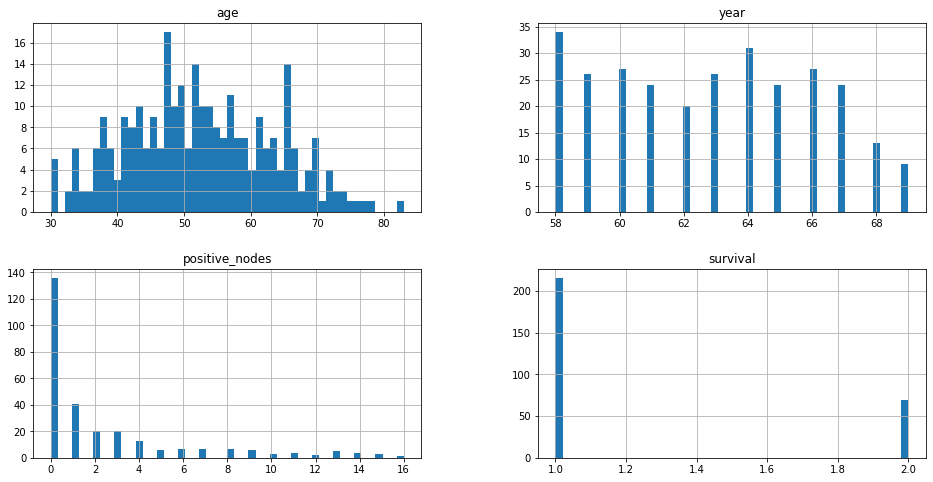

In [35]:
df.hist(bins = 50, figsize = (16, 8))

<AxesSubplot:>

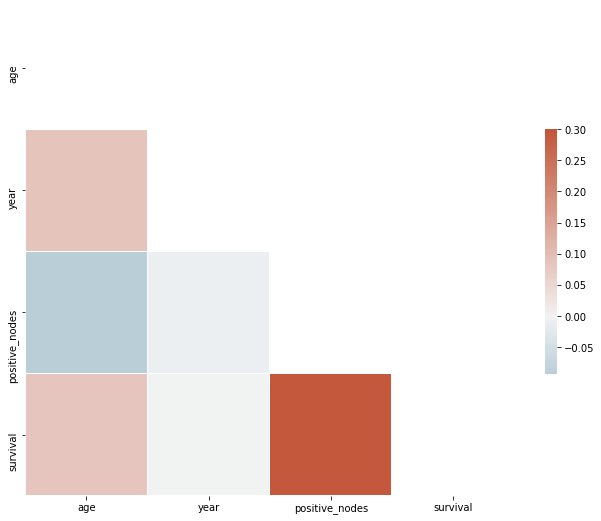

In [36]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
corr

,age,year,positive_nodes,survival
age,1.000000,0.087600,-0.092099,0.085874
year,0.087600,1.000000,-0.006675,-0.000954
positive_nodes,-0.092099,-0.006675,1.000000,0.293436
survival,0.085874,-0.000954,0.293436,1.000000


### Train - Test split 

In [38]:
y = df['survival']
X = df.drop('survival', axis = 1)

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
print(X_train.shape, y_train.shape)

(228, 3) (228,)


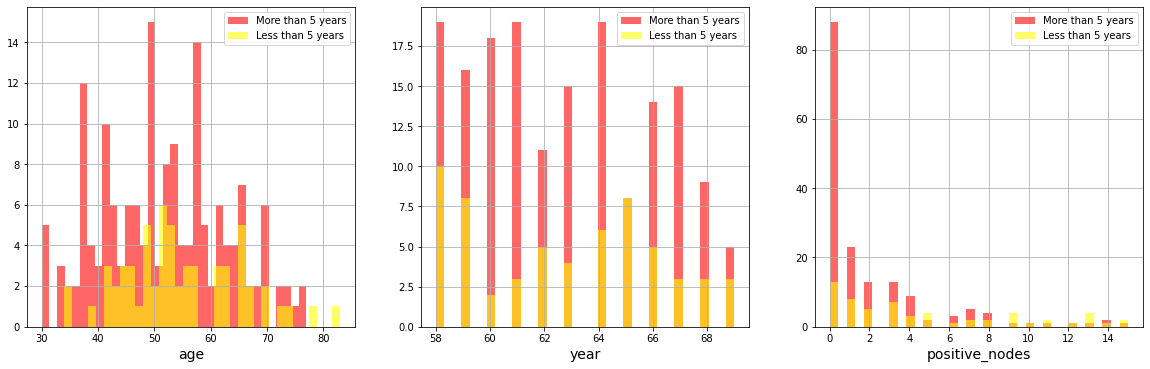

In [41]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    X_train[y_train == 1][column].hist(bins=35, color='red', label='More than 5 years', alpha=0.6)
    X_train[y_train == 2][column].hist(bins=35, color='yellow', label='Less than 5 years', alpha=0.6)
    plt.legend()
    plt.xlabel(column, fontsize = 14)
    print()

### Data Preprocessing

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])


num_attribs = list(X_train.select_dtypes(include = np.number))

full_pipeline = ColumnTransformer([
        ("num_imputer", num_pipeline, num_attribs),
    ])

In [43]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [44]:
X_train_prepared.shape

(228, 3)

In [45]:
y_train.shape

(228,)

### Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42, C = 0.1)

In [47]:
log_reg.fit(X_train_prepared, y_train)

LogisticRegression(C=0.1, random_state=42)

In [48]:
X_test_prepared = full_pipeline.transform(X_test)

log_reg.predict(X_test_prepared)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
log_reg.score(X_test_prepared, y_test, sample_weight = None)

0.8245614035087719

## 2. Iris Dataset Multinomial Classification Using Logistic Regression.

#### loading iris dataset

In [50]:
iris_df = pd.read_csv('iris.csv')

In [51]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [52]:
iris_df.set_index('Id', inplace = True)

### Label encode species

In [53]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris_df['Species'] = le.fit_transform(iris_df['Species'])

In [54]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


In [55]:
iris_df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [56]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### EDA on train set

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

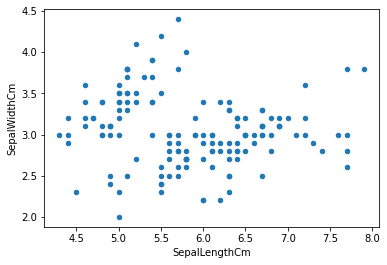

In [57]:
iris_df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

/Users/sc47/programs/webapps/venv/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


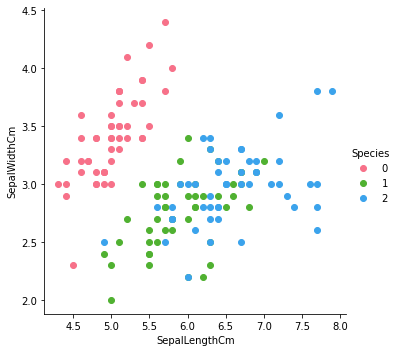

In [58]:
sns.FacetGrid(iris_df, hue = "Species", palette="husl", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

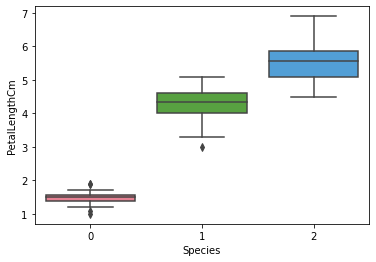

In [59]:
sns.boxplot(x="Species", y="PetalLengthCm", palette="husl", data=iris_df)

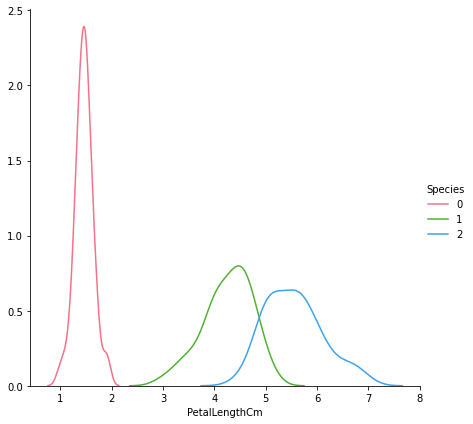

In [60]:
sns.FacetGrid(iris_df, hue="Species", palette="husl", height=6).map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

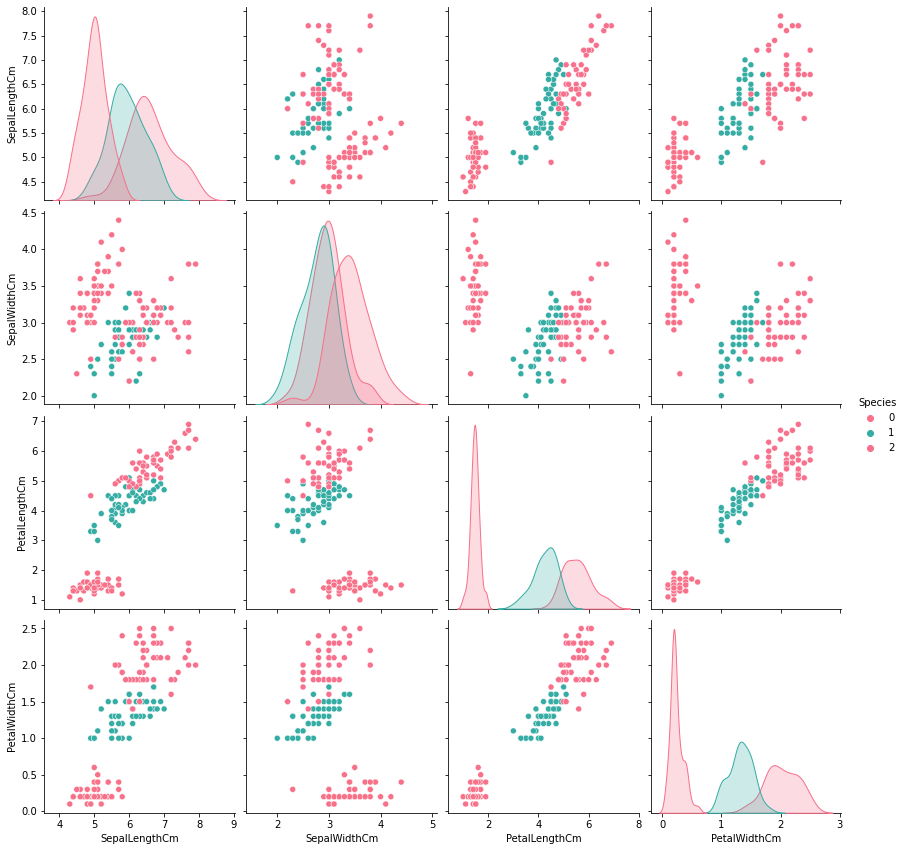

In [61]:
sns.pairplot(iris_df, hue="Species", palette="husl", height=3)

### Train test split

In [62]:
y_iris = iris_df['Species']
X_iris = iris_df.drop('Species', axis = 1)

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size = 0.2, random_state = 42)

In [64]:
y_iris.dtypes

dtype('int64')

### Preprocessing

In [65]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        col_names = "SepalLengthCm", "SepalWidthCm", 'PetalLengthCm', 'PetalWidthCm'
        SepalLengthCm_ix, SepalWidthCm_ix, PetalLengthCm_ix, PetalWidthCm_ix  = [num_attribs.index(c) for c in col_names]
        
        sepal_ratio = X.iloc[:, SepalLengthCm_ix] / X.iloc[:, SepalWidthCm_ix]
        petal_ratio = X.iloc[:, PetalLengthCm_ix] / X.iloc[:, PetalWidthCm_ix]
        length_ratio = X.iloc[:, PetalLengthCm_ix] / X.iloc[:, SepalLengthCm_ix]
        width_ratio = X.iloc[:, PetalWidthCm_ix] / X.iloc[:, SepalWidthCm_ix]
        
        return np.c_[X, sepal_ratio, petal_ratio, length_ratio, width_ratio]

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])


num_attribs = list(X_train.select_dtypes(include = np.number))


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [67]:
X_train_prepared = full_pipeline.fit_transform(X_train)

### Prepare X_test

In [68]:
X_test_prepared = full_pipeline.transform(X_test)

#### prediction using normal model

In [69]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="saga", random_state=42, C = 0.1, multi_class = 'multinomial', penalty = 'elasticnet', l1_ratio = 0.5)

In [70]:
log_reg.fit(X_train_prepared, y_train)

LogisticRegression(C=0.1, l1_ratio=0.5, multi_class='multinomial',
                   penalty='elasticnet', random_state=42, solver='saga')

In [71]:
X_test_prepared = full_pipeline.transform(X_test)

y_pred = log_reg.predict(X_test_prepared)

In [72]:
log_reg.score(X_test_prepared, y_test, sample_weight = None)

1.0

### Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## 3. Abalone Dataset Classification Using Logistic Regression.

In [74]:
abalone_df = pd.read_csv('abalone.data', header = None, names = ['sex', 'length', 'diameter', 'height', 
                                                                 'whole_weight', 'shucked_weight', 'viscera_weight',
                                                                'shell_weight', 'rings'])

In [75]:
abalone_df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [76]:
abalone_df['rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: rings, dtype: int64

In [77]:
abalone_df.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [78]:
abalone_df.shape

(4177, 9)

In [79]:
abalone_df.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [80]:
(abalone_df == 0).sum()

sex               0
length            0
diameter          0
height            2
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [81]:
abalone_df.drop(abalone_df[abalone_df['height'] == 0].index, inplace = True) 

In [82]:
abalone_df.shape

(4175, 9)

array([[<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'whole_weight'}>,
        <AxesSubplot:title={'center':'shucked_weight'}>,
        <AxesSubplot:title={'center':'viscera_weight'}>],
       [<AxesSubplot:title={'center':'shell_weight'}>,
        <AxesSubplot:title={'center':'rings'}>, <AxesSubplot:>]],
      dtype=object)

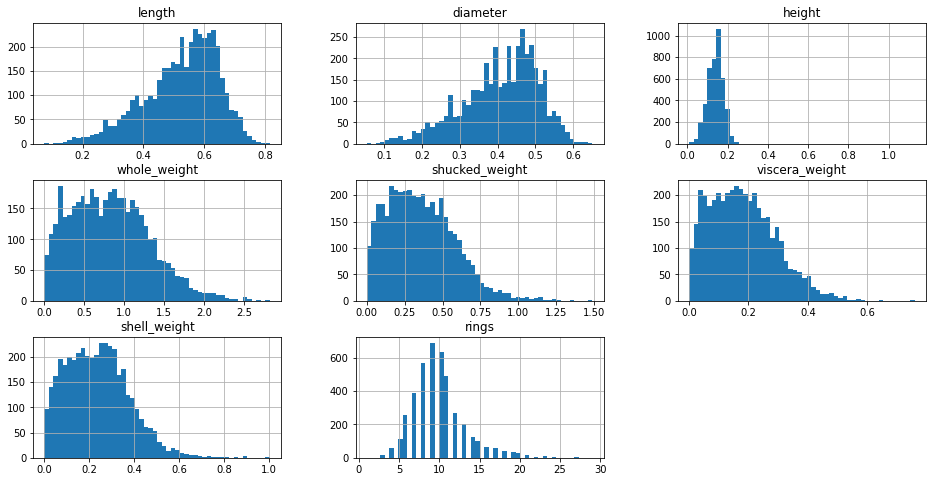

In [83]:
abalone_df.hist(bins = 50, figsize = (16, 8))

<AxesSubplot:>

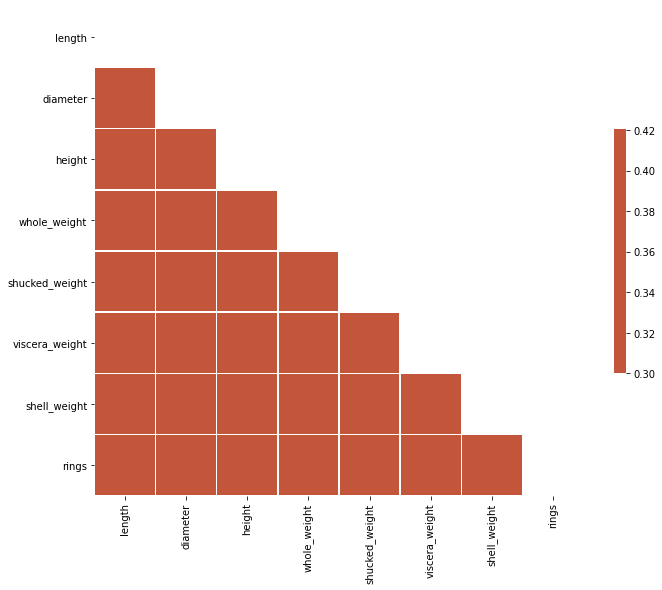

In [84]:
corr = abalone_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
    square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [85]:
corr

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986802,0.828108,0.925217,0.897859,0.902960,0.898419,0.556464
diameter,0.986802,1.000000,0.834298,0.925414,0.893108,0.899672,0.906084,0.574418
height,0.828108,0.834298,1.000000,0.819886,0.775621,0.798908,0.819596,0.557625
whole_weight,0.925217,0.925414,0.819886,1.000000,0.969389,0.966354,0.955924,0.540151
shucked_weight,0.897859,0.893108,0.775621,0.969389,1.000000,0.931924,0.883129,0.420597
viscera_weight,0.902960,0.899672,0.798908,0.966354,0.931924,1.000000,0.908186,0.503562
shell_weight,0.898419,0.906084,0.819596,0.955924,0.883129,0.908186,1.000000,0.627928
rings,0.556464,0.574418,0.557625,0.540151,0.420597,0.503562,0.627928,1.000000


In [86]:
abalone_df.describe(percentiles = [0.05, 0.10, 0.25, 0.5, 0.75, 0.9, 0.95])

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
5%,0.295000,0.22000,0.075000,0.125850,0.052350,0.027000,0.038350,6.000000
10%,0.355000,0.26500,0.090000,0.205200,0.086500,0.043500,0.065000,6.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
90%,0.660000,0.52300,0.185000,1.478300,0.647000,0.326000,0.420000,14.000000


In [87]:
# new_df 

In [88]:
new_df = abalone_df

In [89]:
new_df['rings_cat'] = pd.cut(new_df['rings'],
                               bins = [1, 9, 11, np.inf],
                               labels = [1, 2, 3], right = False)

In [90]:
new_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,rings_cat
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


### train - test split

In [91]:
y = new_df['rings_cat']
X = new_df.drop(['rings', 'rings_cat'], axis = 1)

In [92]:
y.dtypes

CategoricalDtype(categories=[1, 2, 3], ordered=True)

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [94]:
X_train.shape

(3340, 8)

In [95]:
X_train

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
1273,I,0.475,0.380,0.120,0.4410,0.1785,0.0885,0.1505
1746,M,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400
2518,M,0.500,0.400,0.130,0.7715,0.3700,0.1600,0.2110
1282,M,0.500,0.420,0.135,0.6765,0.3020,0.1415,0.2065
3696,M,0.650,0.525,0.205,1.4275,0.6900,0.3060,0.4355
...,...,...,...,...,...,...,...,...
3445,I,0.495,0.400,0.145,0.5780,0.2545,0.1305,0.1645
466,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.4000
3093,F,0.520,0.430,0.150,0.7280,0.3020,0.1575,0.2350
3773,F,0.575,0.460,0.150,0.9270,0.3330,0.2070,0.2985


In [96]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3340 entries, 1273 to 860
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             3340 non-null   object 
 1   length          3340 non-null   float64
 2   diameter        3340 non-null   float64
 3   height          3340 non-null   float64
 4   whole_weight    3340 non-null   float64
 5   shucked_weight  3340 non-null   float64
 6   viscera_weight  3340 non-null   float64
 7   shell_weight    3340 non-null   float64
dtypes: float64(7), object(1)
memory usage: 234.8+ KB


In [97]:
y_train

1273    1
1746    2
2518    1
1282    2
3696    3
       ..
3445    1
466     3
3093    3
3773    2
860     1
Name: rings_cat, Length: 3340, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [98]:
y_train.value_counts()

3    1164
1    1119
2    1057
Name: rings_cat, dtype: int64

### Preprocessing

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse = False)),
])


num_attribs = list(X_train.select_dtypes(include = np.number))
cat_attribs = list(X_train.select_dtypes(include = 'object'))

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs),
    ], remainder = 'passthrough')

In [100]:
X_train_prepared = full_pipeline.fit_transform(X_train)

### Prepare X_test

In [101]:
X_test_prepared = full_pipeline.transform(X_test)

In [102]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="saga", random_state=42, C = 1, multi_class = 'multinomial', penalty = 'elasticnet', l1_ratio = 0.1)

In [103]:
log_reg.fit(X_train_prepared, y_train)

/Users/sc47/programs/webapps/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=1, l1_ratio=0.1, multi_class='multinomial',
                   penalty='elasticnet', random_state=42, solver='saga')

In [104]:
X_test_prepared = full_pipeline.transform(X_test)

y_pred = log_reg.predict(X_test_prepared)

In [105]:
log_reg.score(X_test_prepared, y_test, sample_weight = None)

0.665868263473054

### Confusion Matrix

In [106]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[227,  48,  11],
       [ 65, 123,  78],
       [ 19,  58, 206]])

In [107]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'], 
        'penalty': ['l2'],
        'multi_class': ['multinomial'],
        'C': [0.1, 0.5, 1],
        'random_state': [42],
        'fit_intercept': [True, False],
        'class_weight': [None, 'balanced'],
        'max_iter': [100, 500, 1000],
        'l1_ratio': [None]
    }
  ]

log_reg1 = LogisticRegression()
grid_search = GridSearchCV(log_reg1, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

/Users/sc47/programs/webapps/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/sc47/programs/webapps/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/sc47/programs/webapps/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/sc47/programs/webapps/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/sc47/programs/webapps/venv/lib/python3.8/site-pac

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.5, 1],
                          'class_weight': [None, 'balanced'],
                          'fit_intercept': [True, False], 'l1_ratio': [None],
                          'max_iter': [100, 500, 1000],
                          'multi_class': ['multinomial'], 'penalty': ['l2'],
                          'random_state': [42],
                          'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']}],
             return_train_score=True, scoring='accuracy')

In [108]:
grid_search.best_params_

{'C': 0.5,
 'class_weight': None,
 'fit_intercept': False,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'newton-cg'}

### Grid Search best model

In [109]:
final_model = grid_search.best_estimator_

In [110]:
final_predictions = final_model.predict(X_test_prepared)

In [111]:
final_model.score(X_test_prepared, y_test, sample_weight = None)

0.6622754491017964

### Confusion Matrix

In [112]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, final_predictions)

array([[228,  47,  11],
       [ 67, 119,  80],
       [ 19,  58, 206]])

## 4. Wilt Dataset Classification Using Logistic Regression.

In [113]:
wilt_train = pd.read_csv("wilttraining.csv")
wilt_test = pd.read_csv("wilttesting.csv")

In [114]:
wilt_train.shape

(4339, 6)

In [115]:
wilt_test.shape

(500, 6)

In [116]:
wilt_train

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193
...,...,...,...,...,...,...
4334,n,111.568773,203.588235,93.264706,403.735294,26.512777
4335,n,125.435240,206.394161,93.058394,512.270073,33.466060
4336,n,132.123859,465.343750,295.333333,499.250000,38.762967
4337,n,124.469536,215.152632,98.484211,675.915789,28.506542


In [117]:
wilt_train = wilt_train.sample(frac=1)

In [118]:
wilt_train

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
1812,n,136.388430,187.000000,83.521739,372.043478,13.335854
4015,n,122.118996,247.318182,115.465909,603.829545,16.921428
509,n,117.473958,247.833333,117.333333,844.833333,17.658607
4266,n,117.868571,182.136364,79.454545,212.772727,31.754221
4155,n,127.915360,381.050000,318.350000,680.425000,43.578779
...,...,...,...,...,...,...
1889,n,139.981908,219.500000,98.894737,741.631579,24.314209
3289,n,120.285489,190.675000,84.800000,347.375000,33.179813
4055,n,121.877083,405.266667,348.933333,688.533333,36.406669
3274,n,139.627013,191.557143,82.328571,329.357143,17.253033


In [119]:
wilt_train['class'].value_counts()

n    4265
w      74
Name: class, dtype: int64

In [120]:
wilt_test['class'].value_counts()

n    313
w    187
Name: class, dtype: int64

In [121]:
wilt_train.describe(percentiles = [0.01, 0.025, 0.05, 0.10, 0.25, 0.5, 0.75, 0.9, 0.95, 0.975, 0.99])

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,126.831298,233.906908,117.292439,534.104683,24.924588
std,13.735836,60.757687,60.711159,154.495500,11.008303
min,0.000000,164.625000,59.142857,86.500000,0.000000
1%,90.760601,177.571521,74.906333,205.590766,7.266914
2.5%,98.953850,182.213860,77.859938,242.500000,9.232614
5%,105.516887,187.585576,81.128755,285.689502,11.031368
10%,111.304840,194.440555,85.023520,337.732820,13.499708
25%,118.589080,206.000000,91.975244,422.875000,18.009143
50%,127.479167,221.454545,101.727273,528.500000,23.612444


In [122]:
wilt_train.isnull().sum()

class         0
GLCM_pan      0
Mean_Green    0
Mean_Red      0
Mean_NIR      0
SD_pan        0
dtype: int64

In [123]:
wilt_train.loc[wilt_train['GLCM_pan'] == 0]

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
982,n,0.0,450.0,279.0,592.0,0.0
1015,n,0.0,328.0,223.0,384.0,0.0
993,n,0.0,313.0,207.0,416.0,0.0
2313,n,0.0,336.0,190.0,579.0,0.0


In [124]:
wilt_train.drop(wilt_train.loc[wilt_train['GLCM_pan'] == 0].index, inplace = True)

In [125]:
wilt_train.loc[wilt_train['Mean_Green'] > 600].count()

class         21
GLCM_pan      21
Mean_Green    21
Mean_Red      21
Mean_NIR      21
SD_pan        21
dtype: int64

In [126]:
wilt_train.drop(wilt_train.loc[wilt_train['Mean_Green'] > 600].index, inplace = True)

In [127]:
wilt_train.loc[wilt_train['SD_pan'] > 80].count()

class         19
GLCM_pan      19
Mean_Green    19
Mean_Red      19
Mean_NIR      19
SD_pan        19
dtype: int64

In [128]:
wilt_train.drop(wilt_train.loc[wilt_train['SD_pan'] > 80].index, inplace = True)

In [129]:
wilt_train.shape

(4295, 6)

In [130]:
wilt_train['class'].value_counts()

n    4221
w      74
Name: class, dtype: int64

In [131]:
corr = wilt_train.corr()

In [132]:
corr

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
GLCM_pan,1.000000,-0.092173,-0.074362,-0.098591,-0.054892
Mean_Green,-0.092173,1.000000,0.947099,0.208096,0.163832
Mean_Red,-0.074362,0.947099,1.000000,0.064580,0.162853
Mean_NIR,-0.098591,0.208096,0.064580,1.000000,0.129702
SD_pan,-0.054892,0.163832,0.162853,0.129702,1.000000


In [133]:
y_train = wilt_train['class']
X_train = wilt_train.drop('class', axis = 1)

y_test = wilt_test['class']
X_test = wilt_test.drop('class', axis = 1)

### Oversampling severe minority class using SMOTE

In [134]:
from imblearn.over_sampling import SMOTE

In [135]:
# transform the dataset
oversample = SMOTE(random_state = 42, k_neighbors = 5)
X, y = oversample.fit_resample(X_train, y_train)

In [136]:
X.shape

(8442, 5)

In [137]:
y.shape

(8442,)

In [138]:
X.head()

,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,136.388430,187.000000,83.521739,372.043478,13.335854
1,122.118996,247.318182,115.465909,603.829545,16.921428
2,117.473958,247.833333,117.333333,844.833333,17.658607
3,117.868571,182.136364,79.454545,212.772727,31.754221
4,127.915360,381.050000,318.350000,680.425000,43.578779


In [139]:
y.value_counts()

w    4221
n    4221
Name: class, dtype: int64

In [140]:
X_train = X
y_train = y

In [141]:
X_train.shape

(8442, 5)

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
#     ('adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])


num_attribs = list(X_train.select_dtypes(include = np.number))


full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

In [143]:
X_train_prepared = full_pipeline.fit_transform(X_train)

### Prepare X_test

In [144]:
X_test_prepared = full_pipeline.transform(X_test)

#### prediction using normal model

In [145]:
from sklearn.linear_model import LogisticRegression

# log_reg = LogisticRegression(solver="saga", random_state=42, C = 0.1, multi_class = 'multinomial', 
#                              penalty = 'elasticnet', l1_ratio = 0.5, max_iter = 1000)
log_reg = LogisticRegression(solver="lbfgs", random_state=42, C = 1, multi_class = 'multinomial', class_weight = 'balanced')

In [146]:
from sklearn.model_selection import cross_val_score

log_scores = cross_val_score(log_reg, X_train_prepared, y_train, cv=10)
log_scores.mean()

0.9860216214700355

In [147]:
from sklearn.model_selection import cross_validate

scores = cross_validate(log_reg, X_train_prepared, y_train, cv=3,
                         scoring=('accuracy'),
                         return_train_score=True)

In [148]:
scores

{'fit_time': array([0.06631136, 0.06828809, 0.06375909]),
 'score_time': array([0.00812697, 0.00670004, 0.00798297]),
 'test_score': array([0.98791756, 0.98649609, 0.98436389]),
 'train_score': array([0.98560768, 0.98720682, 0.98685146])}

In [149]:
log_reg.fit(X_train_prepared, y_train)

LogisticRegression(C=1, class_weight='balanced', multi_class='multinomial',
                   random_state=42)

In [150]:
y_pred = log_reg.predict(X_test_prepared)

In [151]:
log_reg.score(X_test_prepared, y_test, sample_weight = None)

0.8

In [152]:
y_pred1 = log_reg.predict_proba(X_test_prepared)

Best Threshold=0.464783, G-Mean=0.987


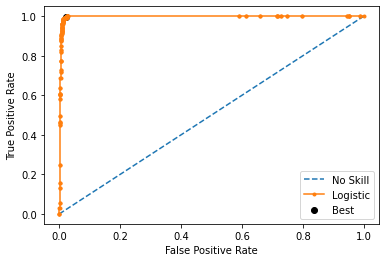

In [153]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_curve

# predict probabilities
yhat = log_reg.predict_proba(X_train_prepared)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat, pos_label = 'w')
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [154]:
thresholds = np.arange(0, 1, 0.01)

In [155]:
from sklearn.metrics import accuracy_score

for threshold in thresholds:
    x = pd.Series((y_pred1[:, 1] >= threshold))
    x.replace([True, False], ['w', 'n'], inplace = True)
    accuracy = accuracy_score(y_test, x)
    print("Threshold: {0:10.2f}".format(threshold))
    print("Accuracy: {0:10.2f} %".format(accuracy * 100))


Threshold:       0.00
Accuracy:      37.40 %
Threshold:       0.01
Accuracy:      62.60 %
Threshold:       0.02
Accuracy:      66.20 %
Threshold:       0.03
Accuracy:      68.60 %
Threshold:       0.04
Accuracy:      70.20 %
Threshold:       0.05
Accuracy:      70.00 %
Threshold:       0.06
Accuracy:      70.00 %
Threshold:       0.07
Accuracy:      70.20 %
Threshold:       0.08
Accuracy:      71.40 %
Threshold:       0.09
Accuracy:      73.00 %
Threshold:       0.10
Accuracy:      73.20 %
Threshold:       0.11
Accuracy:      73.20 %
Threshold:       0.12
Accuracy:      73.80 %
Threshold:       0.13
Accuracy:      74.20 %
Threshold:       0.14
Accuracy:      74.40 %
Threshold:       0.15
Accuracy:      75.00 %
Threshold:       0.16
Accuracy:      75.00 %
Threshold:       0.17
Accuracy:      75.60 %
Threshold:       0.18
Accuracy:      76.40 %
Threshold:       0.19
Accuracy:      77.00 %
Threshold:       0.20
Accuracy:      77.20 %
Threshold:       0.21
Accuracy:      77.20 %
Threshold:

### Confusion Matrix

In [156]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[247,  66],
       [ 34, 153]])

(0.0, 1.0)

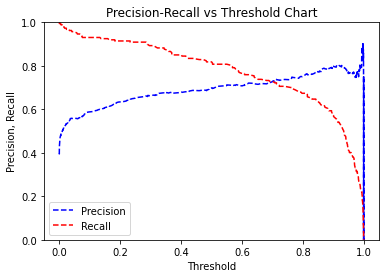

In [157]:
### Predict test_y values and probabilities based on fitted logistic regression model

probs_y=log_reg.predict_proba(X_test_prepared) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1], pos_label = 'w') 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [158]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'], 
        'penalty': ['l2'],
        'multi_class': ['multinomial'],
        'C': [0.1, 0.5, 1],
        'random_state': [42],
        'fit_intercept': [True, False],
        'class_weight': ['balanced'],
        'max_iter': [100, 500, 1000],
        'l1_ratio': [None]
    }
  ]

log_reg1 = LogisticRegression()
grid_search = GridSearchCV(log_reg1, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train_prepared, y_train)

/Users/sc47/programs/webapps/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/sc47/programs/webapps/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/sc47/programs/webapps/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/sc47/programs/webapps/venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/sc47/programs/webapps/venv/lib/python3.8/site-pac

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.5, 1], 'class_weight': ['balanced'],
                          'fit_intercept': [True, False], 'l1_ratio': [None],
                          'max_iter': [100, 500, 1000],
                          'multi_class': ['multinomial'], 'penalty': ['l2'],
                          'random_state': [42],
                          'solver': ['lbfgs', 'sag', 'saga', 'newton-cg']}],
             return_train_score=True, scoring='accuracy')

In [159]:
grid_search.best_params_

{'C': 1,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'saga'}

### Grid Search best model

In [160]:
final_model = grid_search.best_estimator_

In [161]:
final_model

LogisticRegression(C=1, class_weight='balanced', multi_class='multinomial',
                   random_state=42, solver='saga')

In [162]:
final_predictions = final_model.predict(X_test_prepared)

In [163]:
final_pred = final_model.predict_proba(X_test_prepared)

In [164]:
final_model.score(X_test_prepared, y_test, sample_weight = None)

0.8

### Confusion Matrix

In [165]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, final_predictions)

array([[247,  66],
       [ 34, 153]])

Best Threshold=0.415080, G-Mean=0.987


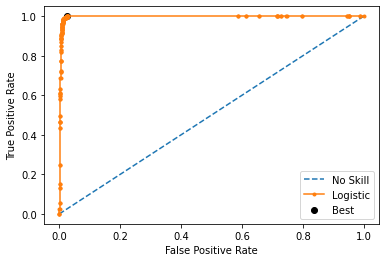

In [166]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_curve

# predict probabilities
yhat = final_model.predict_proba(X_train_prepared)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat, pos_label = 'w')
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [167]:
thresholds = np.arange(0, 1, 0.01)

In [168]:
from sklearn.metrics import accuracy_score

for threshold in thresholds:
    x = pd.Series((final_pred[:, 1] >= threshold))
    x.replace([True, False], ['w', 'n'], inplace = True)
    accuracy = accuracy_score(y_test, x)
    print("Threshold: {0:10.2f}".format(threshold))
    print("Accuracy: {0:10.2f} %".format(accuracy * 100))


Threshold:       0.00
Accuracy:      37.40 %
Threshold:       0.01
Accuracy:      62.00 %
Threshold:       0.02
Accuracy:      66.00 %
Threshold:       0.03
Accuracy:      68.20 %
Threshold:       0.04
Accuracy:      70.20 %
Threshold:       0.05
Accuracy:      70.00 %
Threshold:       0.06
Accuracy:      69.80 %
Threshold:       0.07
Accuracy:      70.20 %
Threshold:       0.08
Accuracy:      71.20 %
Threshold:       0.09
Accuracy:      72.60 %
Threshold:       0.10
Accuracy:      73.00 %
Threshold:       0.11
Accuracy:      73.20 %
Threshold:       0.12
Accuracy:      73.60 %
Threshold:       0.13
Accuracy:      74.00 %
Threshold:       0.14
Accuracy:      74.00 %
Threshold:       0.15
Accuracy:      74.60 %
Threshold:       0.16
Accuracy:      75.20 %
Threshold:       0.17
Accuracy:      75.60 %
Threshold:       0.18
Accuracy:      76.20 %
Threshold:       0.19
Accuracy:      76.80 %
Threshold:       0.20
Accuracy:      77.20 %
Threshold:       0.21
Accuracy:      77.20 %
Threshold: